In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

Preparing data for analysis

In [124]:
all_orders = pd.concat([prior,train],axis = 0)
all_orders = all_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
all_orders = all_orders.merge(aisles, on = 'aisle_id')
all_orders = all_orders.merge(departments, on = 'department_id')
all_orders = all_orders.merge(orders[['order_id','user_id']], on = 'order_id')

In [125]:
aisle_hist = all_orders[['user_id','add_to_cart_order','aisle']].groupby(['user_id','aisle']).sum().reset_index()
dept_hist = all_orders[['user_id','add_to_cart_order','department']].groupby(['user_id','department']).sum().reset_index()

In [104]:
user_volume = aisle_hist.groupby('user_id')['add_to_cart_order'].sum()
user_volume = user_volume.reset_index().rename(columns = {'add_to_cart_order':'volume'})
aisle_hist = aisle_hist.merge(user_volume, how = 'inner', on = 'user_id')
dept_hist = dept_hist.merge(user_volume, how = 'inner', on = 'user_id')

In [105]:
aisle_hist['aisle_share'] = aisle_hist['add_to_cart_order'] / aisle_hist['volume']
dept_hist['dept_share'] = dept_hist['add_to_cart_order'] / dept_hist['volume']

In [106]:
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')

In [107]:
aisle_vol_pivot = aisle_hist[['user_id','aisle','add_to_cart_order']].pivot(index = 'user_id', columns = 'aisle', values = 'add_to_cart_order')
aisle_share_pivot = aisle_hist[['user_id','aisle','aisle_share']].pivot(index = 'user_id', columns = 'aisle', values = 'aisle_share')
dept_vol_pivot = dept_hist[['user_id','department','add_to_cart_order']].pivot(index = 'user_id', columns = 'department', values = 'add_to_cart_order')
dept_share_pivot = dept_hist[['user_id','department','dept_share']].pivot(index = 'user_id', columns = 'department', values = 'dept_share')
aisle_vol_pivot = aisle_vol_pivot.fillna(value = 0)
aisle_share_pivot = aisle_share_pivot.fillna(value = 0)
dept_vol_pivot = dept_vol_pivot.fillna(value = 0)
dept_share_pivot = dept_share_pivot.fillna(value = 0)

In [8]:
all_orders

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id
0,2,33120,1,1,86,16,eggs,dairy eggs,202279
1,2,28985,2,1,83,4,fresh vegetables,produce,202279
2,2,17794,6,1,83,4,fresh vegetables,produce,202279
3,2,43668,9,0,123,4,packaged vegetables fruits,produce,202279
4,2,9327,3,0,104,13,spices seasonings,pantry,202279
...,...,...,...,...,...,...,...,...,...
33819101,1015358,46477,1,0,6,2,other,other,27208
33819102,647259,36631,1,0,6,2,other,other,17880
33819103,2010951,16161,1,0,6,2,other,other,62266
33819104,2684414,1013,1,0,6,2,other,other,69235


In [9]:
prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [10]:
aisle_share_pivot

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.017857,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.025000
2,0.00000,0.010628,0.000000,0.0,0.000000,0.0,0.004159,0.00000,0.0,0.0,...,0.023105,0.003235,0.006932,0.000000,0.00000,0.000000,0.0,0.008318,0.0,0.186229
3,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.038363,0.012788,0.000000,0.000000,0.00000,0.000000,0.0,0.028133,0.0,0.000000
4,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.060000,0.00000,0.000000,0.0,0.040000,0.0,0.000000
5,0.02008,0.076305,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.064257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.00000,0.000000,0.009828,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.228501
206206,0.00000,0.021958,0.000000,0.0,0.000000,0.0,0.012809,0.00183,0.0,0.0,...,0.003660,0.000000,0.000000,0.000000,0.00000,0.003660,0.0,0.004575,0.0,0.000000
206207,0.00000,0.000000,0.000000,0.0,0.011862,0.0,0.000000,0.00000,0.0,0.0,...,0.008252,0.022692,0.000000,0.012893,0.00722,0.000000,0.0,0.033522,0.0,0.053120


Performing PCA analysis to reduce features

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

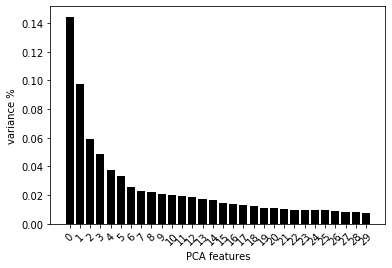

In [12]:
pca = PCA(n_components = 30)
principalComponents = pca.fit_transform(aisle_share_pivot)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color = 'black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.xticks(rotation = 45)

PCA_components = pd.DataFrame(principalComponents)

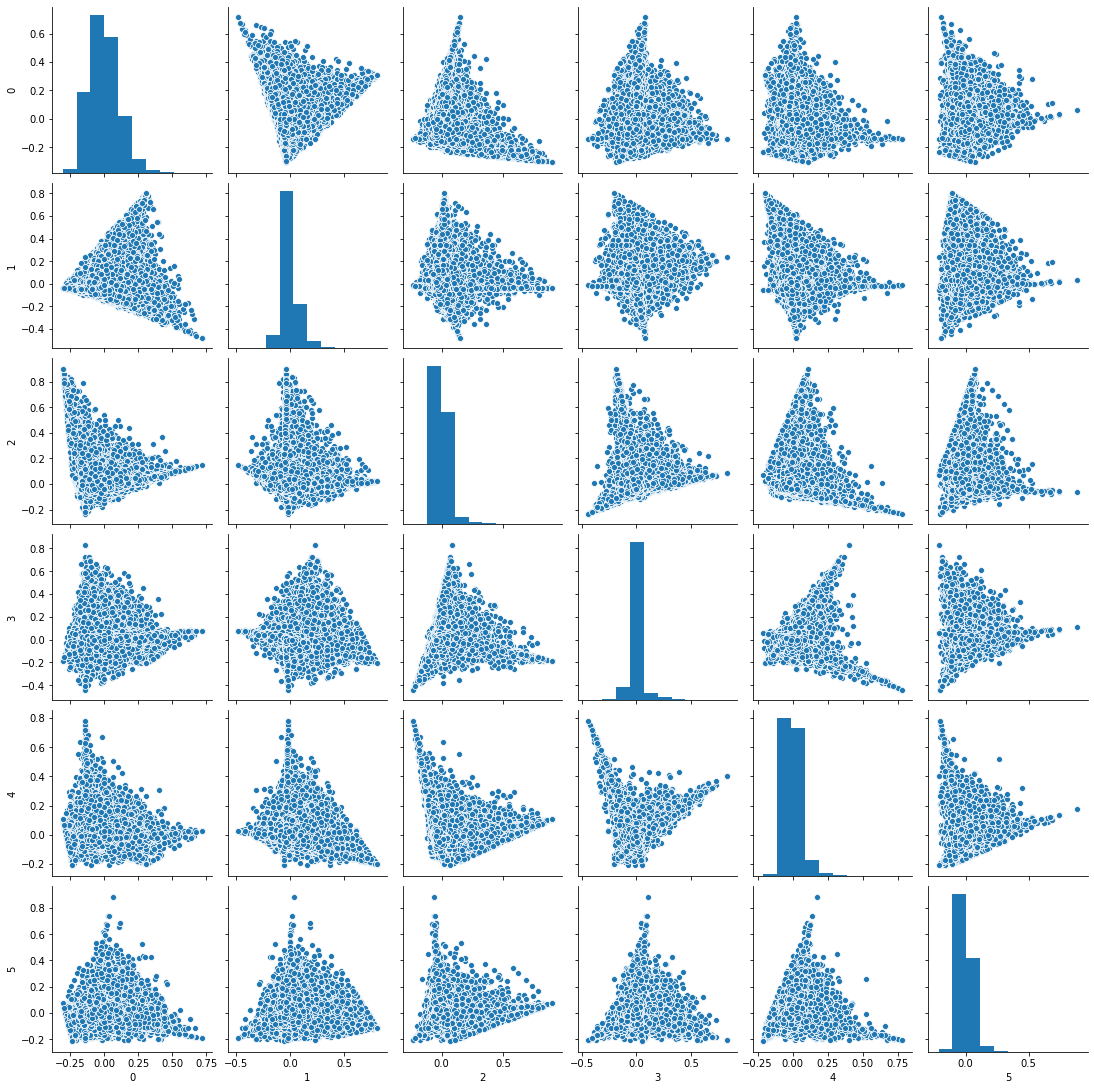

In [13]:
sns.pairplot(PCA_components[[0,1,2,3,4,5]])

Performing kmeans clustering

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

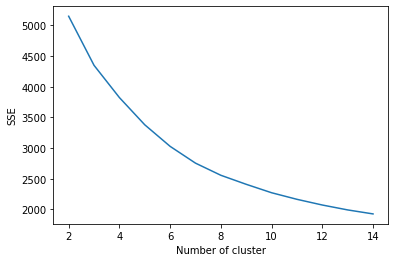

In [15]:
sse = {}
labels = {}
for k in range(2,15):
    kmeans = KMeans(n_clusters = k).fit(PCA_components[[0,1,2,3,4,5]])
    sse[k] = kmeans.inertia_
    labels[k] = kmeans.labels_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [112]:
cluster_df = pd.concat([PCA_components[[0,1,2,3,4,5]],pd.Series(labels[6]).rename('cluster')], axis = 1)

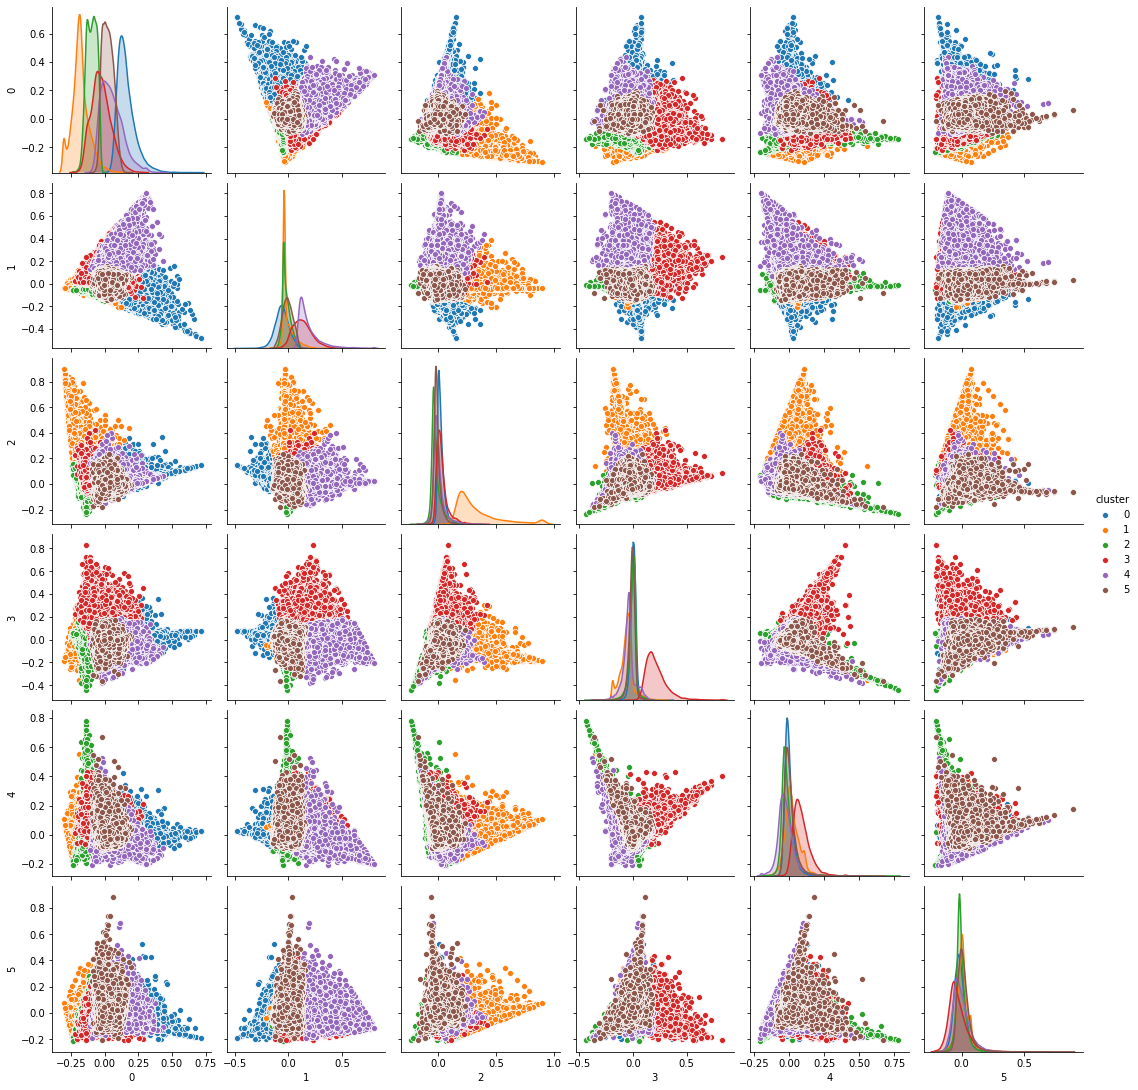

In [17]:
sns.pairplot(cluster_df, hue = 'cluster')

Preparing data for cluster analysis

In [113]:
cluster_df = pd.concat([pd.Series(aisle_share_pivot.index),cluster_df],axis = 1)

In [114]:
cluster_df

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048617,-0.031836,-0.005633,-0.053015,-0.055213,2
1,2,-0.077766,0.077983,-0.076149,-0.101670,0.081781,-0.040406,2
2,3,0.057496,0.085719,0.001779,-0.013191,-0.028496,0.113063,5
3,4,-0.055343,0.134731,-0.002392,-0.037708,-0.087808,-0.027363,4
4,5,0.133936,-0.019591,-0.020960,-0.003730,0.057734,0.138895,5
...,...,...,...,...,...,...,...,...
206204,206205,-0.021674,0.081783,-0.073480,-0.088436,0.155964,-0.022700,5
206205,206206,-0.040316,-0.036658,-0.024052,0.010058,-0.051022,0.000835,2
206206,206207,-0.022110,-0.032613,-0.009468,-0.015799,0.021500,0.020459,5
206207,206208,-0.002217,-0.010633,-0.037621,-0.007752,0.028734,0.044838,5


In [115]:
aisle_hist

,user_id,aisle,add_to_cart_order,volume,aisle_share
0,1,candy chocolate,8,280,0.028571
1,1,cereal,26,280,0.092857
2,1,cream,17,280,0.060714
3,1,fresh fruits,30,280,0.107143
4,1,milk,9,280,0.032143
...,...,...,...,...,...
5919835,206209,soft drinks,26,912,0.028509
5919836,206209,soy lactosefree,20,912,0.021930
5919837,206209,spices seasonings,9,912,0.009868
5919838,206209,trash bags liners,6,912,0.006579


In [116]:
cluster_aisle_br = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')

In [117]:
cluster_aisle_br = cluster_aisle_br.rename(columns = {'aisle_share':'user_aisle_share'})

In [118]:
aisle_hist = aisle_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
aisle_hist = aisle_hist.rename(columns = {'aisle_share':'user_aisle_share'})

In [119]:
dept_hist = dept_hist.merge(cluster_df[['user_id','cluster']], on = 'user_id')
dept_hist = dept_hist.rename(columns = {'dept_share':'user_dept_share'})

In [120]:
cluster_aisle_br = pd.DataFrame(columns = ['aisle','add_to_cart_order','aisle_share','cluster'])
for i in range(0,6):
    x = aisle_hist[aisle_hist['cluster'] == i]
    x = x.groupby('aisle')['add_to_cart_order'].sum().reset_index()
    x['aisle_share'] = x['add_to_cart_order']
    x['aisle_share'] = x['aisle_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_aisle_br = pd.concat([x,cluster_aisle_br], axis = 0)

In [ ]:
cluster_aisle_br

In [ ]:
aisle_hist

In [121]:
t20 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:20].index)
t30 = list(aisle_hist.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False)[0:30].index)

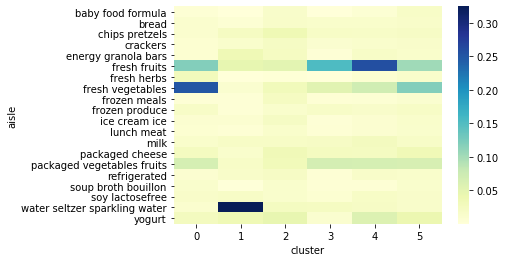

In [122]:
aisle_heat = cluster_aisle_br[cluster_aisle_br['aisle'].isin(t20)]
aisle_heat = aisle_heat.pivot(index = 'aisle', columns = 'cluster', values = 'aisle_share')
sns.heatmap(aisle_heat,cmap="YlGnBu")

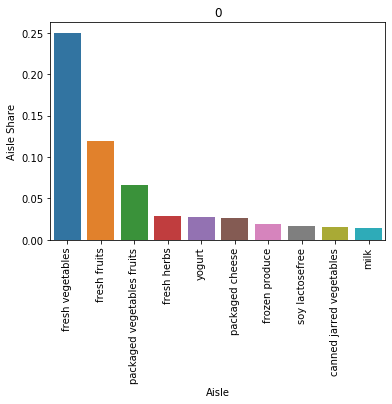

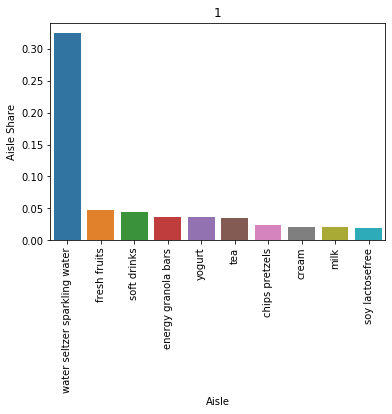

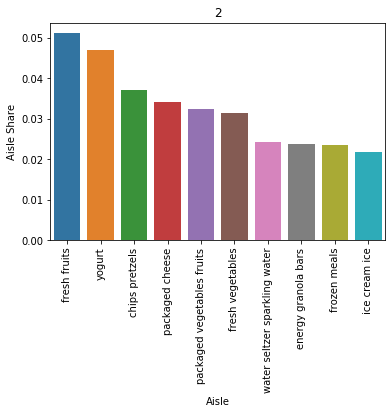

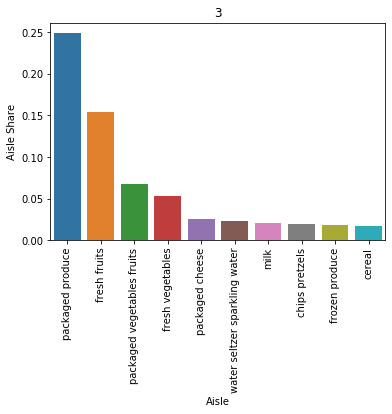

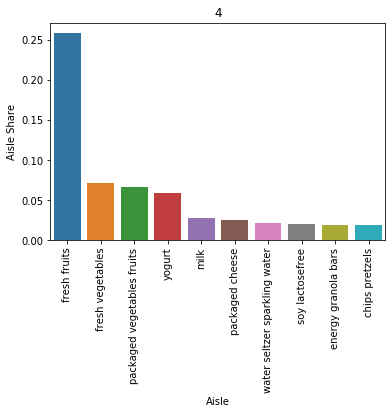

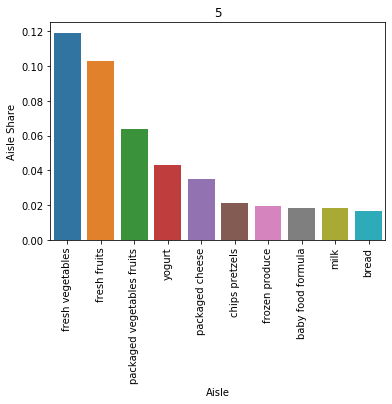

<Figure size 432x288 with 0 Axes>

In [123]:
for i in range(0,6):
    x = sns.barplot(data = cluster_aisle_br[cluster_aisle_br['cluster'] == i].sort_values('aisle_share', ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
    x.set_xticklabels(x.get_xticklabels(), rotation=90)
    plt.title(str(i))
    x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')
    plt.figure()

In [32]:
cluster_dept_br = pd.DataFrame(columns = ['department','add_to_cart_order','dept_share','cluster'])
for i in range(0,6):
    x = dept_hist[dept_hist['cluster'] == i]
    x = x.groupby('department')['add_to_cart_order'].sum().reset_index()
    x['dept_share'] = x['add_to_cart_order']
    x['dept_share'] = x['dept_share'].apply(lambda f: f / x['add_to_cart_order'].sum())
    x['cluster'] = i
    cluster_dept_br = pd.concat([x,cluster_dept_br], axis = 0)

In [33]:
cluster_dept_br[cluster_dept_br['cluster'] == 5].dept_share.sum()

1.0

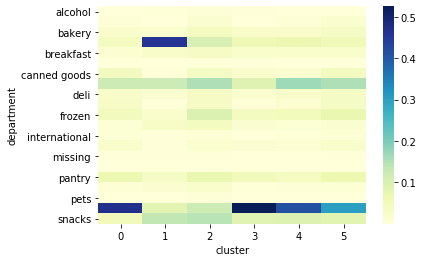

In [61]:
dept_heat = cluster_dept_br.pivot(index = 'department', columns = 'cluster', values = 'dept_share')
sns.heatmap(dept_heat,cmap="YlGnBu")

In [35]:
cluster_dept_br

,department,add_to_cart_order,dept_share,cluster
0,alcohol,210890,0.001504,5
1,babies,2778690,0.019823,5
2,bakery,4949070,0.035307,5
3,beverages,7843048,0.055952,5
4,breakfast,2993274,0.021354,5
...,...,...,...,...
16,pantry,3002413,0.065370,0
17,personal care,378700,0.008245,0
18,pets,35396,0.000771,0
19,produce,21520354,0.468554,0


In [36]:
pd.DataFrame(cluster_df['cluster'].value_counts().reset_index())

,index,cluster
0,2,73434
1,5,72887
2,0,33250
3,4,14853
4,3,7943
5,1,3842


In [72]:
cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100

0    16.124417
1     1.863158
2    35.611443
3     3.851917
4     7.202886
5    35.346178
Name: cluster, dtype: float64

In [66]:
cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100

cluster
0    16.230024
1     0.364899
2    29.634945
3     0.784196
4     3.452699
5    49.533237
Name: add_to_cart_order, dtype: float64

In [91]:
x = pd.concat([cluster_df['cluster'].value_counts().sort_index() / cluster_df['cluster'].value_counts().sum() * 100,cluster_aisle_br.groupby('cluster')['add_to_cart_order'].sum() / cluster_aisle_br['add_to_cart_order'].sum() * 100], axis = 1)
x.rename(columns = {'cluster':'User Share','add_to_cart_order':'Unit Purchase Share'})

,User Share,Unit Purchase Share
0,16.124417,16.230024
1,1.863158,0.364899
2,35.611443,29.634945
3,3.851917,0.784196
4,7.202886,3.452699
5,35.346178,49.533237


In [39]:
cluster_df.head()

,user_id,0,1,2,3,4,5,cluster
0,1,-0.103161,0.048617,-0.031836,-0.005633,-0.053015,-0.055213,2
1,2,-0.077766,0.077983,-0.076149,-0.101670,0.081781,-0.040406,2
2,3,0.057496,0.085719,0.001779,-0.013191,-0.028496,0.113063,5
3,4,-0.055343,0.134731,-0.002392,-0.037708,-0.087808,-0.027363,4
4,5,0.133936,-0.019591,-0.020960,-0.003730,0.057734,0.138895,5


In [40]:
cluster_aisle_br

,aisle,add_to_cart_order,aisle_share,cluster
0,air fresheners candles,52409,0.000374,5
1,asian foods,873605,0.006232,5
2,baby accessories,45180,0.000322,5
3,baby bath body care,48794,0.000348,5
4,baby food formula,2603476,0.018573,5
...,...,...,...,...
129,trash bags liners,21035,0.000458,0
130,vitamins supplements,55097,0.001200,0
131,water seltzer sparkling water,573506,0.012487,0
132,white wines,4729,0.000103,0


In [126]:
all_orders = all_orders.merge(cluster_df[['user_id','cluster']], on = 'user_id')

In [128]:
all_orders

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id,cluster
0,2,33120,1,1,86,16,eggs,dairy eggs,202279,5
1,2,28985,2,1,83,4,fresh vegetables,produce,202279,5
2,2,17794,6,1,83,4,fresh vegetables,produce,202279,5
3,2,43668,9,0,123,4,packaged vegetables fruits,produce,202279,5
4,2,9327,3,0,104,13,spices seasonings,pantry,202279,5
...,...,...,...,...,...,...,...,...,...,...
33819101,2942910,36885,1,1,134,5,specialty wines champagnes,alcohol,95228,2
33819102,77392,47713,1,1,134,5,specialty wines champagnes,alcohol,95228,2
33819103,679020,47713,1,1,134,5,specialty wines champagnes,alcohol,95228,2
33819104,1264096,47713,1,1,134,5,specialty wines champagnes,alcohol,95228,2


In [127]:
cluster_df.to_csv('cluster_df')

In [129]:
all_orders.to_csv('all_orders.csv')